# Census API - Creating DataFrames

In [1]:
# import packages

from us import states
import pandas as pd
import requests

# import doc with API key

import config

## Example: Test API Call via Census API

#### The responses from Census API calls are in the format of list of lists.

In [2]:
censusAPIurl = "https://api.census.gov/data/2019/acs/acs5/profile?get=NAME,DP05_0001E,DP05_0003E,DP05_0002E&for=state:36&key={0}".format(config.MY_API_KEY)
callResponse = requests.request("GET", censusAPIurl)

# Text attribute allows you to examine the response.
# Integers are returned as string.
# You will need to convert the data type to int if you'd like to use it as such.

print(callResponse.text)

[["NAME","DP05_0001E","DP05_0003E","DP05_0002E","state"],
["New York","19572319","10071318","9501001","36"]]


#### The JSON method `.json()` of a response object returns a list of lists.

In [3]:
print(callResponse.json())

[['NAME', 'DP05_0001E', 'DP05_0003E', 'DP05_0002E', 'state'], ['New York', '19572319', '10071318', '9501001', '36']]


In [4]:
# Return first list (headers) with index 0.

print(callResponse.json()[0])
print(callResponse.json()[1])

['NAME', 'DP05_0001E', 'DP05_0003E', 'DP05_0002E', 'state']
['New York', '19572319', '10071318', '9501001', '36']


#### Construct a `pandas DataFrame` to create a table from the data.

In [5]:
# DataFrame is a class. Instantiate a dataframe by supplying the column name and data rows.
# Slicing is used in the data parameter `[1:]` in order to skip row [0].

df = pd.DataFrame(columns=callResponse.json()[0], data=callResponse.json()[1:])
df

,NAME,DP05_0001E,DP05_0003E,DP05_0002E,state
0,New York,19572319,10071318,9501001,36


#### You can also rename columns in your data frame.

In [6]:
columnNames = ('State', 'Total Population', 'Female Population', 'Male Population', 'FIPs')

df = pd.DataFrame(columns=columnNames, data=callResponse.json()[1:])
df

,State,Total Population,Female Population,Male Population,FIPs
0,New York,19572319,10071318,9501001,36


#### And change string types to integers

In [7]:
df['Total Population'] = df['Total Population'].astype(int)
df['Female Population'] = df['Female Population'].astype(int)
df['Male Population'] = df['Male Population'].astype(int)

#### Add a new calculated column to your data frame.

In [8]:
df['Percent Female']=df['Female Population']/df['Total Population']
df['Percent Male']=df['Male Population']/df['Total Population']

df = df[['State', 'FIPs', 'Total Population', 'Female Population','Percent Female','Male Population','Percent Male']]
df

,State,FIPs,Total Population,Female Population,Percent Female,Male Population,Percent Male
0,New York,36,19572319,10071318,0.514569,9501001,0.485431


## Add all states to dataframe created in the previous example

In [9]:
censusAPIurl2 = "https://api.census.gov/data/2019/acs/acs5/profile?get=NAME,DP05_0001E,DP05_0003E,DP05_0002E&for=state:*&key={0}".format(config.MY_API_KEY)
callResponse2 = requests.request("GET", censusAPIurl2)

# Create data frame
dfAllStates = pd.DataFrame(columns=columnNames, data=callResponse2.json()[1:])

# Convert to integers
dfAllStates['Total Population'] = dfAllStates['Total Population'].astype(int)
dfAllStates['Female Population'] = dfAllStates['Female Population'].astype(int)
dfAllStates['Male Population'] = dfAllStates['Male Population'].astype(int)

In [10]:
dfAllStates['Percent Female']=dfAllStates['Female Population']/dfAllStates['Total Population']
dfAllStates['Percent Male']=dfAllStates['Male Population']/dfAllStates['Total Population']

dfAllStates = dfAllStates[['State', 'FIPs', 'Total Population', 'Female Population','Percent Female','Male Population','Percent Male']]
dfAllStates.head(5)

,State,FIPs,Total Population,Female Population,Percent Female,Male Population,Percent Male
0,Alabama,01,4876250,2516895,0.516154,2359355,0.483846
1,Alaska,02,737068,352153,0.477775,384915,0.522225
2,Arizona,04,7050299,3545790,0.502928,3504509,0.497072
3,Arkansas,05,2999370,1527610,0.509310,1471760,0.490690
4,California,06,39283497,19757199,0.502939,19526298,0.497061


In [11]:
# .head() allows you to specify the first few rows

dfAllStates.head(5)

,State,FIPs,Total Population,Female Population,Percent Female,Male Population,Percent Male
0,Alabama,01,4876250,2516895,0.516154,2359355,0.483846
1,Alaska,02,737068,352153,0.477775,384915,0.522225
2,Arizona,04,7050299,3545790,0.502928,3504509,0.497072
3,Arkansas,05,2999370,1527610,0.509310,1471760,0.490690
4,California,06,39283497,19757199,0.502939,19526298,0.497061


In [12]:
# groups each "row" data together

for index, row in dfAllStates.iterrows():
    print(index, row)

0 State                 Alabama
FIPs                       01
Total Population      4876250
Female Population     2516895
Percent Female       0.516154
Male Population       2359355
Percent Male         0.483846
Name: 0, dtype: object
1 State                  Alaska
FIPs                       02
Total Population       737068
Female Population      352153
Percent Female       0.477775
Male Population        384915
Percent Male         0.522225
Name: 1, dtype: object
2 State                 Arizona
FIPs                       04
Total Population      7050299
Female Population     3545790
Percent Female       0.502928
Male Population       3504509
Percent Male         0.497072
Name: 2, dtype: object
3 State                Arkansas
FIPs                       05
Total Population      2999370
Female Population     1527610
Percent Female        0.50931
Male Population       1471760
Percent Male          0.49069
Name: 3, dtype: object
4 State                California
FIPs                      

#### Sorting DataFrames

In [13]:
# use sort to change the way the rows are sorted

dfAllStates.sort_values(["Total Population"],ascending=False).head()

,State,FIPs,Total Population,Female Population,Percent Female,Male Population,Percent Male
4,California,06,39283497,19757199,0.502939,19526298,0.497061
43,Texas,48,28260856,14226847,0.503412,14034009,0.496588
9,Florida,12,20901636,10680823,0.511004,10220813,0.488996
32,New York,36,19572319,10071318,0.514569,9501001,0.485431
38,Pennsylvania,42,12791530,6526417,0.510214,6265113,0.489786


#### Creating New DataFrames from Filtering Data
Reset the index with the `.reset_index` method

In [14]:
newDf = dfAllStates.loc[(dfAllStates['Total Population']>10000000)]
newDf.reset_index(drop = True, inplace = True)
newDf

,State,FIPs,Total Population,Female Population,Percent Female,Male Population,Percent Male
0,California,06,39283497,19757199,0.502939,19526298,0.497061
1,Florida,12,20901636,10680823,0.511004,10220813,0.488996
2,Georgia,13,10403847,5341751,0.513440,5062096,0.486560
3,Illinois,17,12770631,6498459,0.508860,6272172,0.491140
4,New York,36,19572319,10071318,0.514569,9501001,0.485431
5,North Carolina,37,10264876,5268238,0.513230,4996638,0.486770
6,Ohio,39,11655397,5943632,0.509947,5711765,0.490053
7,Pennsylvania,42,12791530,6526417,0.510214,6265113,0.489786
8,Texas,48,28260856,14226847,0.503412,14034009,0.496588


#### Extract lists from Data Frame

In [20]:
totalPopulation = dfAllStates["Total Population"].tolist()
femalePop = dfAllStates["Female Population"].tolist()
malePop = dfAllStates["Male Population"].tolist()

states = dfAllStates["State"].tolist()

## Matplotlib

In [31]:
# import package

from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

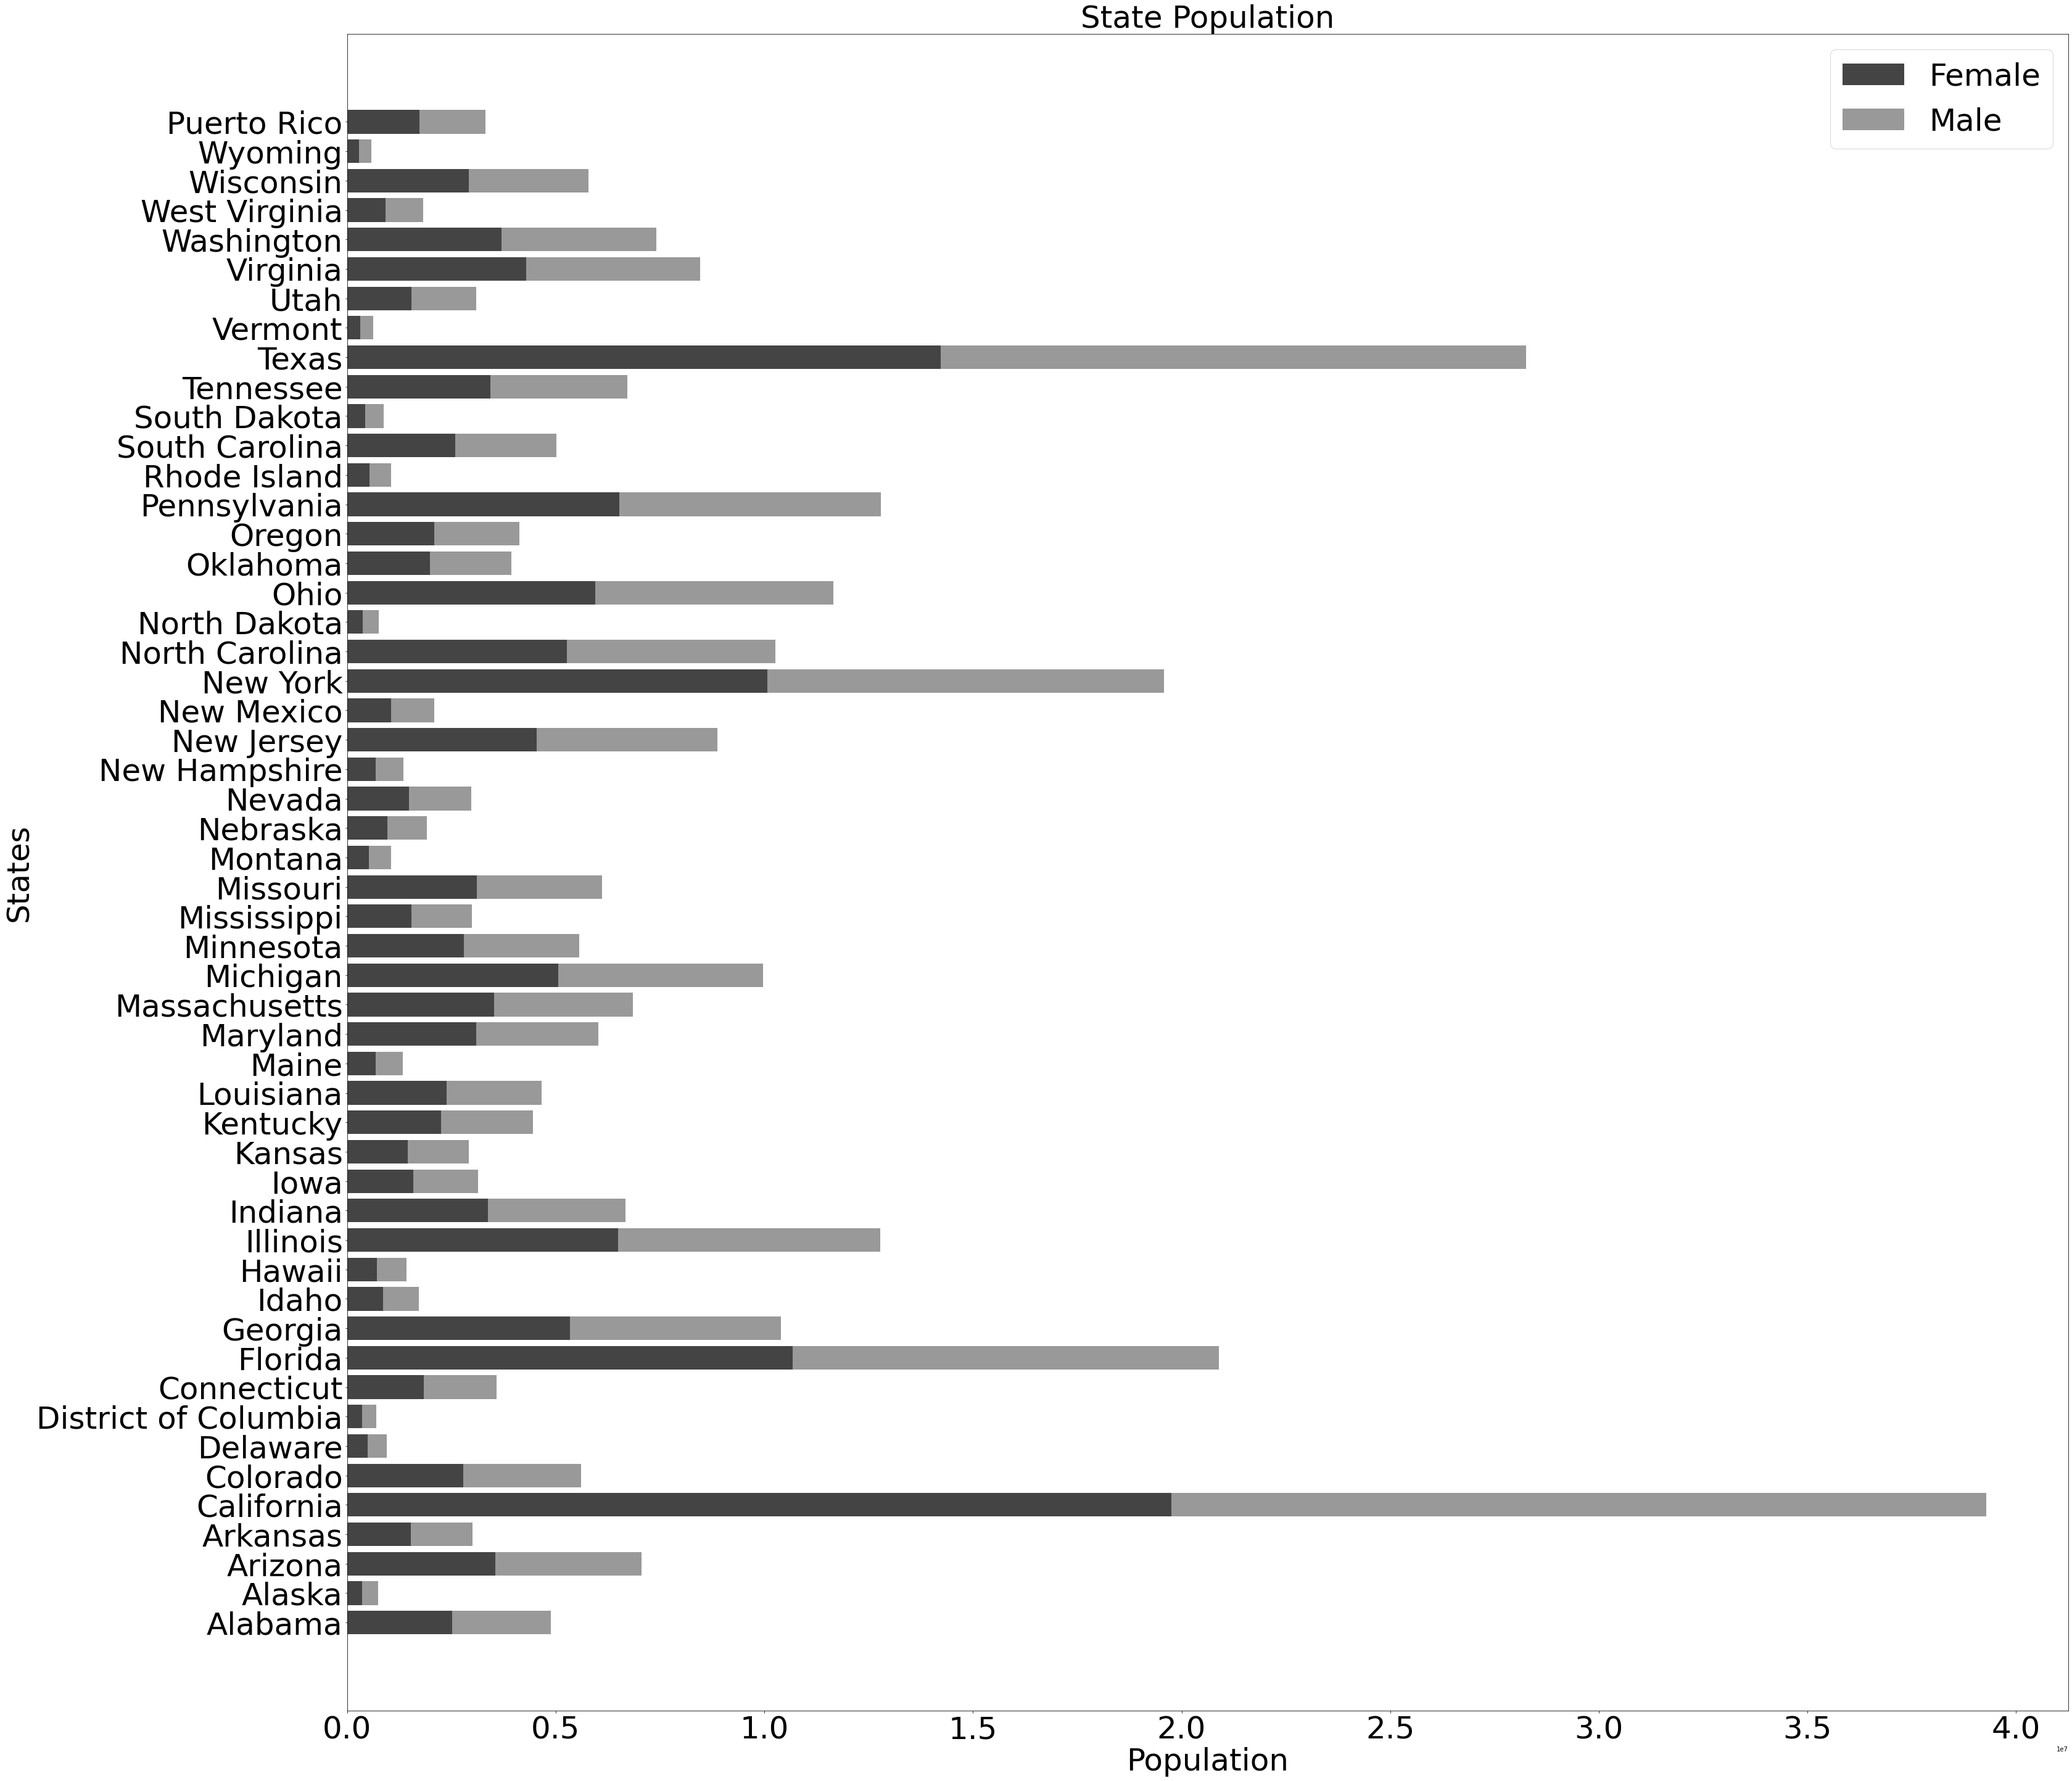

In [42]:
fig = plt.figure(figsize=(50,50))

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)


plt.title('State Population',fontsize=50)
plt.ylabel('States',fontsize=50)
plt.xlabel('Population',fontsize=50)

plt.barh(states, femalePop,0.8, color = "#444444",label="Female")
plt.barh(states, malePop, 0.8, left = femalePop, color= "#999999",label="Male")

plt.legend(fontsize=50)
plt.show()